<a href="https://colab.research.google.com/github/Alexcon19/Modelo-IA-Selecci-n-Fibra/blob/main/CAMILO_NAUFFAL_TAREA_4_C_DOE_DCL_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Librerías Básicas para Diseño de Experimentos**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.formula.api as smf
import scipy.stats as stats
!pip install bioinfokit
from bioinfokit.analys import stat
!pip install pingouin
import pingouin as pg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.7/87.7 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.3-py3-none-any.whl size=59055 sha256=5a05b1d054c8666fbecf9362a5c2eeb8957a7285c3da9d172ec7051a8497698c
  Stored in directory: /root/.cache/pip/wheels/ac/67/a7/4e0b4172d5415933127e819d7d7080ae08a6220949ad2f6de5
Successfully built bioinfokit
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7028 sha256=796def082934be80d56f415183f5dfa6c6a8f7967ec17e7cdf06e95b5d357052
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


#  **Tarea 4: Diseños Cuadrados Latinos - DCL usando Python: Versión 2**

##  <span style="color:green">**Tarea 4. Se quiere estudiar el efecto de cinco diferentes catalizadores (A, B, C, D y E) sobre el tiempo de reacción de un proceso químico (TRPQ). Cada lote de material sólo permite cinco corridas y cada corrida requiere aproximadamente 1.5 horas, por lo que sólo se pueden realizar cinco corridas diarias. El experimentador decide correr los experimentos con un diseño en cuadro latino para controlar activa mente los lotes y días. Los datos obtenidos son:**</span>

|      |      |         | Día   |       |       |       |
|------|------|---------|-------|-------|-------|-------|
|      |      |   1     |   2   |   3   |   4   |   5   |
|------|------|---------|-------|-------|-------|-------|
|      | 1    | A = 8   | B = 7 | D = 1 | C = 7 | E = 3 |
|Lote  | 2    | C = 11  | E = 2 | A = 7 | D = 3 | B = 8 |
|      | 3    | B = 4   | A = 9 | C = 10| E = 1 | D = 5 |
|      | 4    | D = 6   | C = 8 | E = 6 | B = 6 | A = 10|
|      | 5    | E = 4   | D = 2 | B = 3 | A = 8 | C = 8 |



**¿Existen diferencias en la diferentes concentraciones de vitamina B con respecto a TGP?**


## **4.1 Los Datos del Problema**

In [ ]:
## **4.1 Los Datos del Problema**
Dias  =  [ "1" ,  "2" ,  "3" ,  "4", "5" ]
Lotes  =  [ "1" ,  "2" ,  "3" ,  "4", "5" ]
CATALIZADORES = ["A", "B", "D","C","E", "C", "E", "A","D", "B", "B", "A", "C", "E", "D", "D", "C" ,"E" , "B", "A", "E", "D", "B", "A", "C"]
TRPQ =[8,7,1,7,3,11,2,7,3,8,4,9,10,1,5,6,8,6,6,10,4,2,3,8,8]

## **4.2 Construyamos el dataFrame de los precios y productos**

In [ ]:
## **4.2 Construyamos el dataFrame de los precios y productos**
DCL = pd.DataFrame({'Días': Dias*5, 'Lotes':Lotes*5, 'CATALIZADORES':CATALIZADORES, 'TRPQ':TRPQ})


## **4.3 Veamos el DataFrame**

In [ ]:
## **4.3 Veamos el DataFrame**
DCL

,Días,Lotes,CATALIZADORES,TRPQ
0,1,1,A,8
1,2,2,B,7
2,3,3,D,1
3,4,4,C,7
4,5,5,E,3
5,1,1,C,11
6,2,2,E,2
7,3,3,A,7
8,4,4,D,3
9,5,5,B,8


## **4.5. BoxPlot para DCL - TGP múltiple**

<Axes: title={'center': 'TRPQ vs CATALIZADORES'}, xlabel='CATALIZADORES', ylabel='TRPQ'>

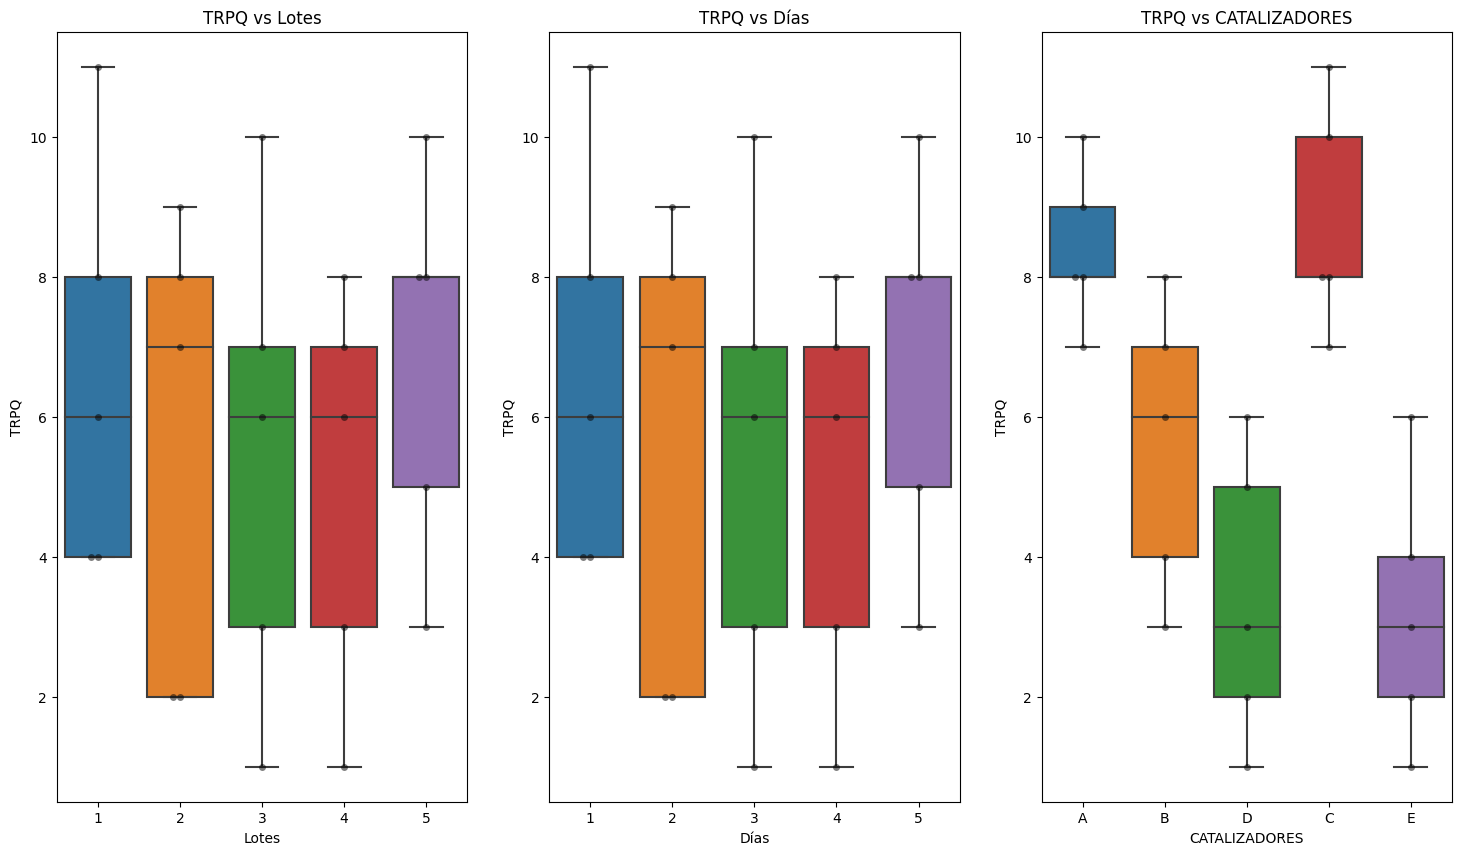

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(18, 10))
axs[0].set_title('TRPQ vs Lotes')
sns.boxplot(x="Lotes", y="TRPQ", data=DCL, ax=axs[0])
sns.swarmplot(x="Lotes", y="TRPQ", data=DCL, color='black',
              alpha = 0.5, ax=axs[0])

axs[1].set_title('TRPQ vs Días')
sns.boxplot(x="Días", y="TRPQ", data=DCL, ax=axs[1])
sns.swarmplot(x="Días", y="TRPQ", data=DCL, color='black',
              alpha = 0.5, ax=axs[1])
axs[2].set_title('TRPQ vs CATALIZADORES')
sns.boxplot(x="CATALIZADORES", y="TRPQ", data=DCL, ax=axs[2])
sns.swarmplot(x="CATALIZADORES", y="TRPQ", data=DCL, color='black',
              alpha = 0.5, ax=axs[2])


## **4.6 Diagrama Bivariado no es sposible dado que no hay replicas**

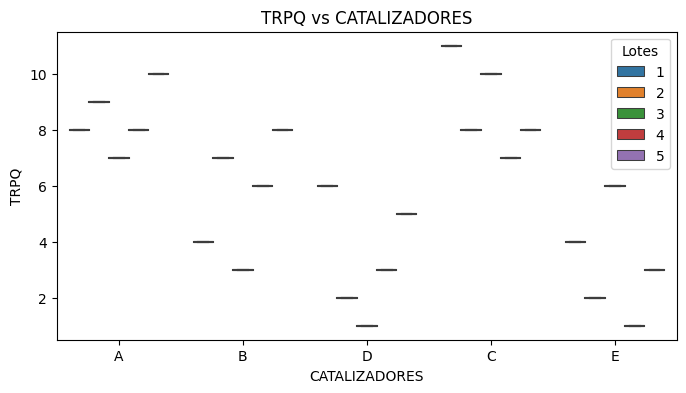

In [ ]:
## **4.6 Diagrama Bivariado no es sposible dado que no hay replicas**
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title('TRPQ vs CATALIZADORES')
sns.boxplot(x="CATALIZADORES", y="TRPQ", hue='Lotes', data=DCL, ax=ax);

## **4.7 Análisis de Varianza Tipo II**

In [ ]:
# **4.7 Análisis de Varianza Tipo II**
modeloDCL = ols("TRPQ ~ CATALIZADORES + Lotes+Días", data = DCL).fit()
anova_result2 = sm.stats.anova_lm(modeloDCL, typ=2)
print (anova_result2)

               sum_sq    df          F    PR(>F)
CATALIZADORES  141.44   4.0  10.682779  0.000207
Lotes           12.24   4.0   0.924471  0.474092
Días            12.24   4.0   0.924471  0.474092
Residual        52.96  16.0        NaN       NaN


In [ ]:
anova_result2.T

,CATALIZADORES,Lotes,Días,Residual
sum_sq,141.440000,12.240000,12.240000,52.96
df,4.000000,4.000000,4.000000,16.00
F,10.682779,0.924471,0.924471,NaN
PR(>F),0.000207,0.474092,0.474092,NaN


In [ ]:
print(modeloDCL.summary())

                            OLS Regression Results                            
Dep. Variable:                   TRPQ   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     5.804
Date:                Sun, 22 Oct 2023   Prob (F-statistic):            0.00142
Time:                        07:52:58   Log-Likelihood:                -44.857
No. Observations:                  25   AIC:                             107.7
Df Residuals:                      16   BIC:                             118.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              9.1200      1

In [ ]:
# **4.7 Análisis de Varianza Tipo IiI**
modeloDCL = ols("TRPQ ~ CATALIZADORES + Lotes+Días", data = DCL).fit()
anova_result3 = sm.stats.anova_lm(modeloDCL, typ=3)
print (anova_result3)

               sum_sq    df          F        PR(>F)
Intercept      231.04   1.0  69.800604  3.144621e-07
CATALIZADORES  141.44   4.0  10.682779  2.069354e-04
Lotes           12.24   4.0   0.924471  4.740920e-01
Días            12.24   4.0   0.924471  4.740920e-01
Residual        52.96  16.0        NaN           NaN


## **4.9 Comparaciones Múltiples:DCL - TGP**
### **a. Comparaciones Múltiples: TGP VS VITAMINAS**

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,-2.8,0.1423,-7.0741,1.4741,False
A,C,0.4,0.9965,-3.8741,4.6741,False
A,D,-5.0,0.0024,-9.2741,-0.7259,True
A,E,-5.2,0.0016,-9.4741,-0.9259,True
B,C,3.2,0.0733,-1.0741,7.4741,False
B,D,-2.2,0.3361,-6.4741,2.0741,False
B,E,-2.4,0.2578,-6.6741,1.8741,False
C,D,-5.4,0.0011,-9.6741,-1.1259,True
C,E,-5.6,0.0007,-9.8741,-1.3259,True
D,E,-0.2,0.9998,-4.4741,4.0741,False


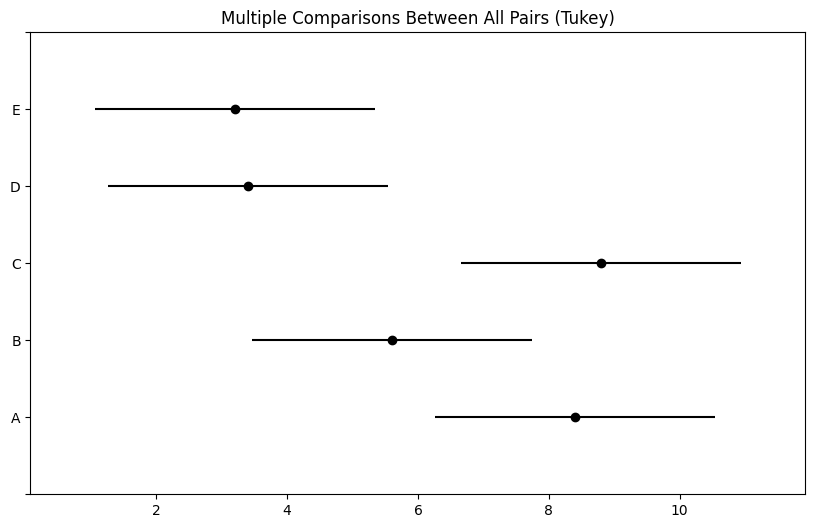

In [ ]:
### **a. Comparaciones Múltiples: TRPQ VS CATALIZADORES**
tukey = pairwise_tukeyhsd(endog=DCL["TRPQ"],     # Data
                          groups=DCL["CATALIZADORES"],   # Groups
                          alpha=0.01)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
#plt.vlines(x=200,ymin=-0.5,ymax=14.5, color="red")
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,-2.8,0.1423,-6.2171,0.6171,False
A,C,0.4,0.9965,-3.0171,3.8171,False
A,D,-5.0,0.0024,-8.4171,-1.5829,True
A,E,-5.2,0.0016,-8.6171,-1.7829,True
B,C,3.2,0.0733,-0.2171,6.6171,False
B,D,-2.2,0.3361,-5.6171,1.2171,False
B,E,-2.4,0.2578,-5.8171,1.0171,False
C,D,-5.4,0.0011,-8.8171,-1.9829,True
C,E,-5.6,0.0007,-9.0171,-2.1829,True
D,E,-0.2,0.9998,-3.6171,3.2171,False


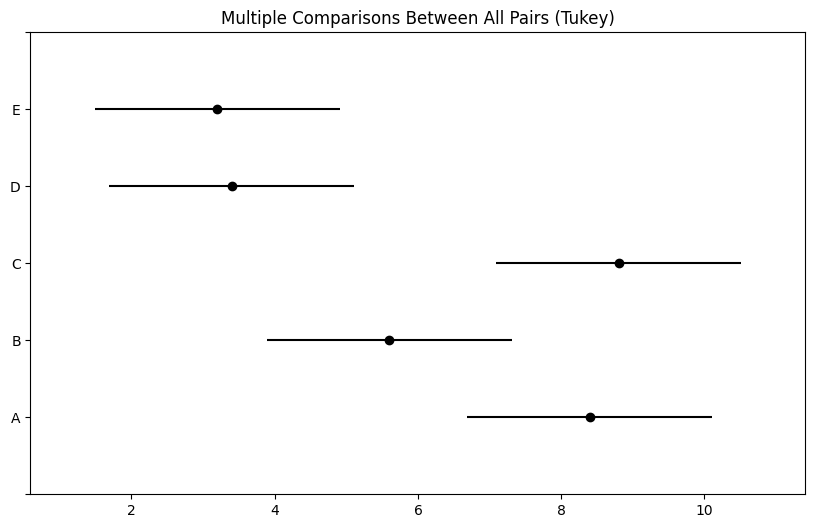

In [ ]:
### **a. Comparaciones Múltiples: TRPQ VS CATALIZADORES**
tukey = pairwise_tukeyhsd(endog=DCL["TRPQ"],     # Data
                          groups=DCL["CATALIZADORES"],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
#plt.vlines(x=200,ymin=-0.5,ymax=14.5, color="red")
tukey.summary()

### **b. Comparaciones Múltiples: TGP VS Razas**

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-1.0,0.9857,-6.9004,4.9004,False
1,3,-1.2,0.9721,-7.1004,4.7004,False
1,4,-1.6,0.924,-7.5004,4.3004,False
1,5,0.2,1.0,-5.7004,6.1004,False
2,3,-0.2,1.0,-6.1004,5.7004,False
2,4,-0.6,0.998,-6.5004,5.3004,False
2,5,1.2,0.9721,-4.7004,7.1004,False
3,4,-0.4,0.9996,-6.3004,5.5004,False
3,5,1.4,0.9518,-4.5004,7.3004,False
4,5,1.8,0.8886,-4.1004,7.7004,False


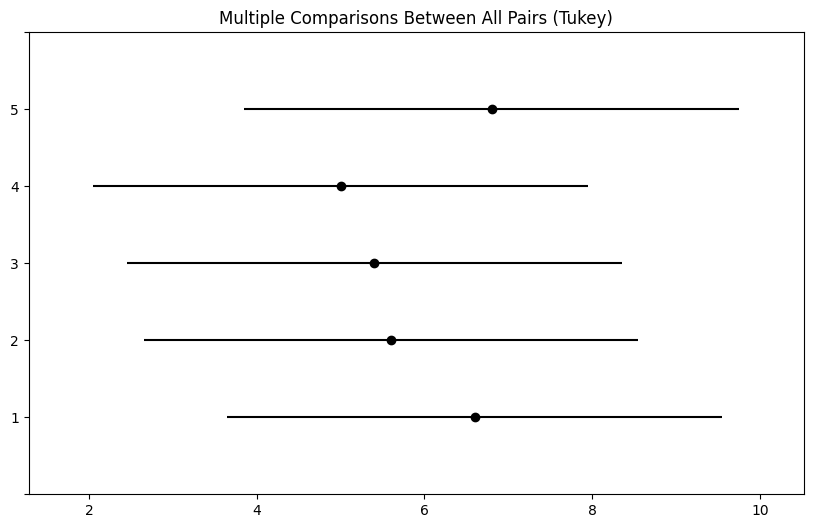

In [ ]:
### **b. Comparaciones Múltiples: TRPQ VS Lotes**
tukey = pairwise_tukeyhsd(endog=DCL["TRPQ"],     # Data
                          groups=DCL["Lotes"],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
#plt.vlines(x=200,ymin=-0.5,ymax=14.5, color="red")
tukey.summary()

### **c. Comparaciones Múltiples: TGP VS Patologías**

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-1.0,0.9857,-6.9004,4.9004,False
1,3,-1.2,0.9721,-7.1004,4.7004,False
1,4,-1.6,0.924,-7.5004,4.3004,False
1,5,0.2,1.0,-5.7004,6.1004,False
2,3,-0.2,1.0,-6.1004,5.7004,False
2,4,-0.6,0.998,-6.5004,5.3004,False
2,5,1.2,0.9721,-4.7004,7.1004,False
3,4,-0.4,0.9996,-6.3004,5.5004,False
3,5,1.4,0.9518,-4.5004,7.3004,False
4,5,1.8,0.8886,-4.1004,7.7004,False


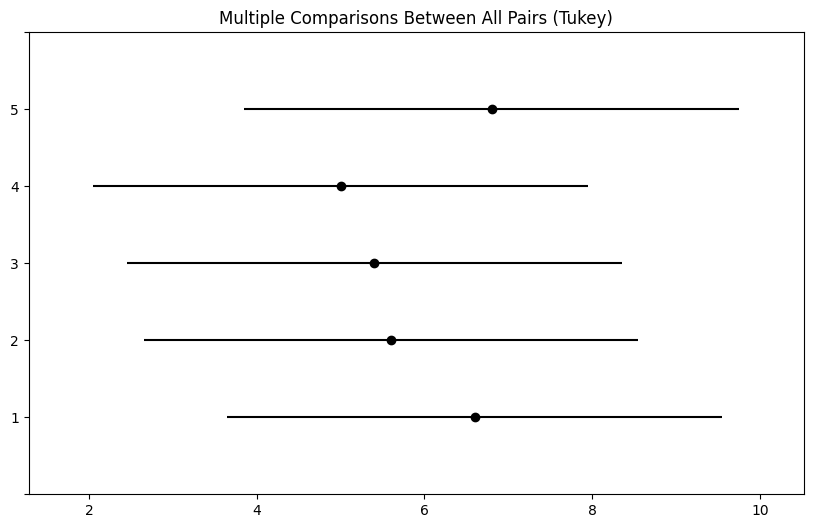

In [ ]:
### **c. Comparaciones Múltiples: TRPQ VS Días**
tukey = pairwise_tukeyhsd(endog=DCL["TRPQ"],     # Data
                          groups=DCL["Días"],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
#plt.vlines(x=200,ymin=-0.5,ymax=14.5, color="red")
tukey.summary()

### **d. Comparaciones Múltiples Forma 2**

In [ ]:
# **d. Comparaciones Múltiples Forma 2**
pg.pairwise_ttests(
    dv      = 'TRPQ',
    within  = 'CATALIZADORES',
    subject = 'Lotes',
    padjust = 'holm',
    data    = DCL
)

/usr/local/lib/python3.10/dist-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,CATALIZADORES,A,B,True,True,5.715476,4.0,two-sided,0.004636,0.037087,holm,12.3,1.511386
1,CATALIZADORES,A,C,True,True,-0.371391,4.0,two-sided,0.729182,1.000000,holm,0.421,-0.255471
2,CATALIZADORES,A,D,True,True,5.976143,4.0,two-sided,0.003940,0.035457,holm,13.843,2.698903
3,CATALIZADORES,A,E,True,True,4.333333,4.0,two-sided,0.012317,0.073904,holm,6.063,2.970501
4,CATALIZADORES,B,C,True,True,-2.048590,4.0,two-sided,0.109866,0.549330,holm,1.276,-1.544942
5,CATALIZADORES,B,D,True,True,1.900511,4.0,two-sided,0.130162,0.549330,holm,1.135,0.958263
6,CATALIZADORES,B,E,True,True,1.444630,4.0,two-sided,0.222068,0.666205,holm,0.794,1.083871
7,CATALIZADORES,C,D,True,True,5.244944,4.0,two-sided,0.006319,0.044233,holm,9.825,2.607090
8,CATALIZADORES,C,E,True,True,10.982504,4.0,two-sided,0.000391,0.003906,holm,75.102,2.827544
9,CATALIZADORES,D,E,True,True,0.147442,4.0,two-sided,0.889917,1.000000,holm,0.401,0.090323


## **4.10 Supuestos del Modelo**
# **a. Forma 1. Shapiro Wilks**

In [ ]:
# **a. Forma 1. Shapiro Wilks**
stats.shapiro(modeloDCL.resid)

ShapiroResult(statistic=0.952199399471283, pvalue=0.2808738648891449)

# **b. Prueba gráfica con el gráfico de probabilidad Normal y el Histograma**

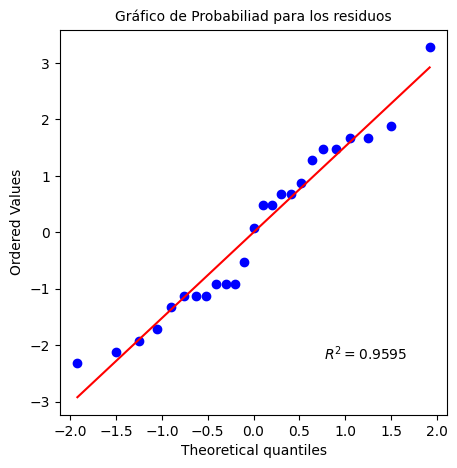

In [ ]:
# **b. Prueba gráfica con el gráfico de probabilidad Normal y el Histograma**
fig = plt.figure(figsize= (5, 5))
ax = fig.add_subplot(111)
normality_plot, stat = stats.probplot(modeloDCL.resid, plot= plt, rvalue= True)
ax.set_title("Gráfico de Probabiliad para los residuos", fontsize= 10)
ax.set

plt.show()

# **c. Prueba gráfica con el gráfico de probabilidad Normal y el Histograma: Por VITAMINAS**

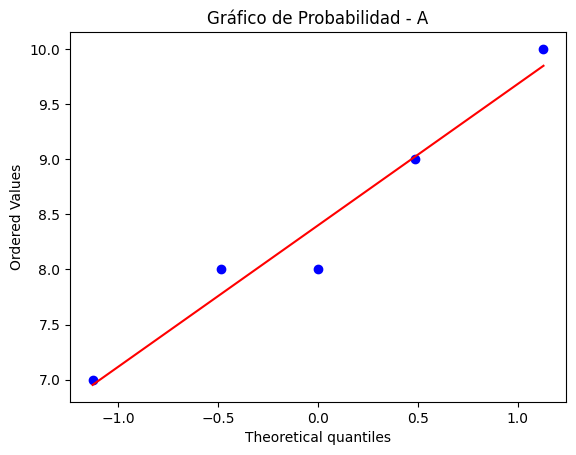

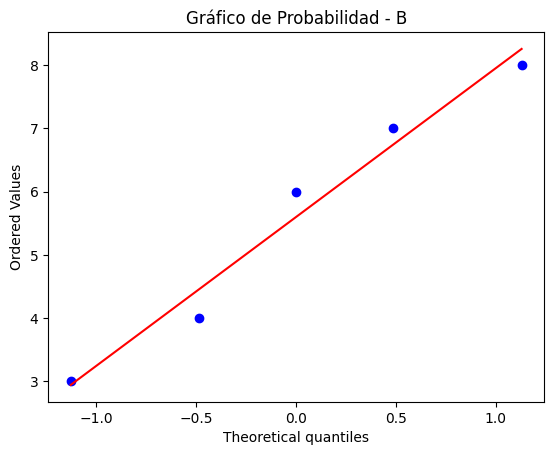

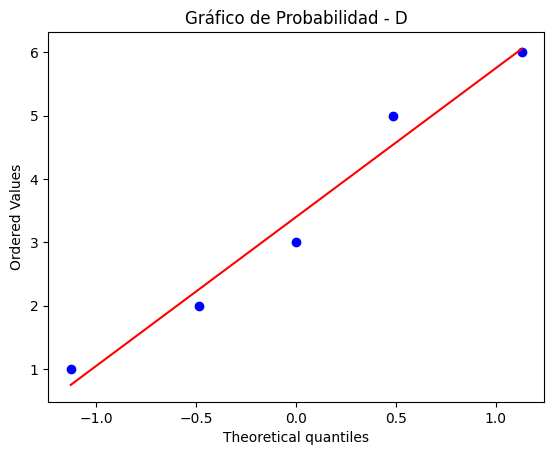

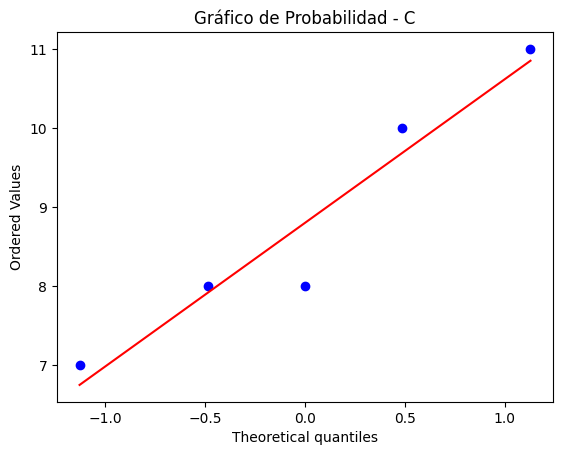

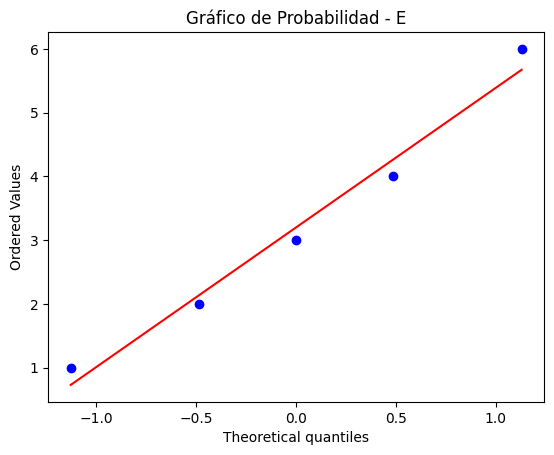

In [ ]:
# **c. Prueba gráfica con el gráfico de probabilidad Normal y el Histograma: Por VITAMINAS**
unique_vitaminas = DCL['CATALIZADORES'].unique()
for vitamina in unique_vitaminas:
    stats.probplot(DCL[DCL['CATALIZADORES'] == vitamina]['TRPQ'], dist="norm", plot=plt)
    plt.title("Gráfico de Probabilidad - "+vitamina)
    plt.show()

## **d. Histograma + curva normal teórica**

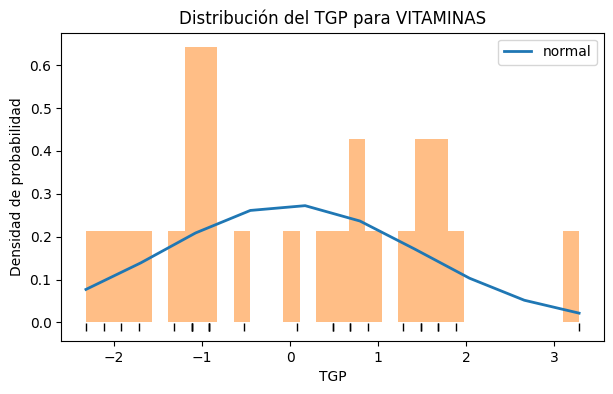

In [ ]:
## **d. Histograma + curva normal teórica**
# ==============================================================================

# Valores de la media (mu) y desviación típica (sigma) de los datos
tgp2 = modeloDCL.resid
mu, sigma = stats.norm.fit(tgp2)

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(tgp2), max(tgp2), num=10)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=tgp2, density=True, bins=30,  alpha=0.5)
ax.plot(tgp2, np.full_like(tgp2, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución del TGP para VITAMINAS')
ax.set_xlabel('TGP')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

## **e. Homocedasticidad de los residuos: Usando la prueba de Levene**

In [ ]:
# e. Homocedasticidad de los residuos: Usando la prueba de Levene
stats.levene(DCL['TRPQ'][DCL['CATALIZADORES'] == 'A'],
             DCL['TRPQ'][DCL['CATALIZADORES'] == 'B'],
             DCL['TRPQ'][DCL['CATALIZADORES'] == 'C'],
             DCL['TRPQ'][DCL['CATALIZADORES'] == 'D'])

LeveneResult(statistic=0.5866666666666667, pvalue=0.6324588439234449)